In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:

df = pd.read_csv('housing.csv')
len(df)

20640

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

del df['ocean_proximity']

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Exploratory data analysis

In [7]:
 print(sns.__version__)

0.11.2


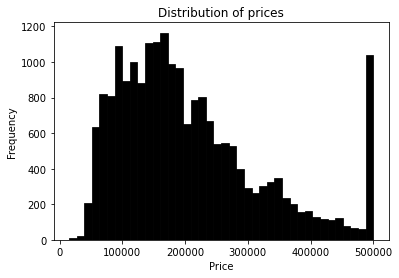

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

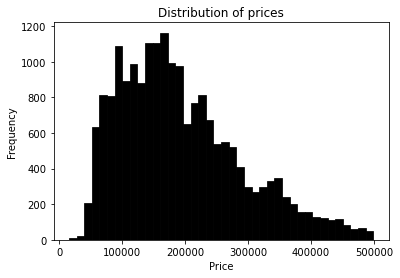

In [9]:


plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value[df.median_house_value < 500000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()



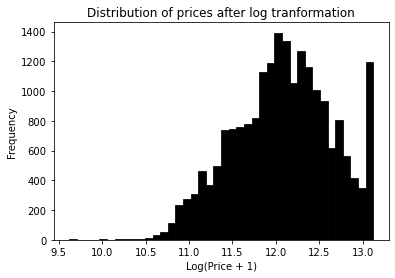

In [10]:

log_price = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [11]:
#Q1
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [12]:
#Q1
df.isnull().any().sum()

1

In [13]:
#Q2
df['population'].median()

1166.0

# Validation framework

In [14]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [15]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [16]:
df_train_bedrm_0 = df_train.copy()
df_train_bedrm_0['total_bedrooms']=df_train_bedrm_0['total_bedrooms'].fillna(0)
df_train_bedrm_0[df_train_bedrm_0['total_bedrooms']==0]

df_train_bedrm_mean = df_train.copy()
df_train_bedrm_mean['total_bedrooms']= df_train_bedrm_mean['total_bedrooms'].fillna(df_train_bedrm_mean['total_bedrooms'].mean())
df_train_bedrm_mean[df_train_bedrm_0['total_bedrooms']==df_train_bedrm_mean['total_bedrooms'].mean()]

df_train_bedrm_mean['total_bedrooms'].mean()


533.4803317730147

# Linear Regression

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Baseline solution

In [18]:
base = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

In [19]:
def prepare_X(df):
    df_num = df[base]
    #df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [20]:
X_train_0 = prepare_X(df_train_bedrm_0)
w_0_0, w0 = train_linear_regression(X_train_0, y_train)

X_train_mean = prepare_X(df_train_bedrm_0)
w_0_mean, wmean = train_linear_regression(X_train_mean, y_train)

In [21]:
y_pred_0 = w_0_0 + X_train_0.dot(w0)
y_pred_mean = w_0_mean + X_train_mean.dot(wmean)

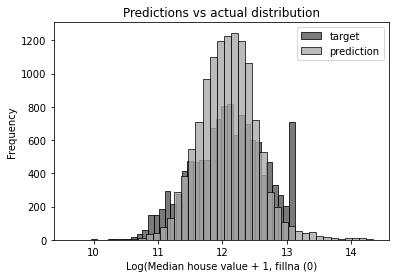

In [22]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_0, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Median house value + 1, fillna (0)')
plt.title('Predictions vs actual distribution')

plt.show()

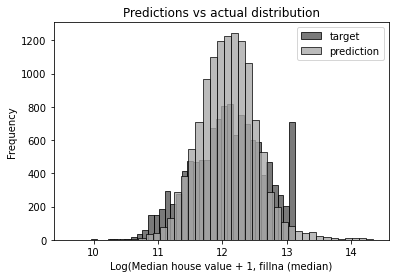

In [23]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Median house value + 1, fillna (median)')
plt.title('Predictions vs actual distribution')

plt.show()

In [24]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
rmse(y_train, y_pred_0)

0.3413135910156676

In [26]:
rmse(y_train, y_pred_mean)

0.3413135910156676

# Regularization

In [27]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


In [28]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [29]:
X_train = prepare_X(df_train)

In [40]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train_0.dot(w)
    print('%5s, %.2f, %.2f' % (r, w_0, rmse(y_train,y_pred)))

    0, -11.69, 0.34
0.001, -11.67, 0.34
 0.01, -11.53, 0.34
  0.1, -10.27, 0.34
    1, -4.92, 0.35
   10, -0.79, 0.35


In [41]:
def split(nseed=42):
    np.random.seed(nseed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    return df_train, df_val, df_test


In [45]:
rmse_val = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test = split(nseed=s)
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train_0, y_train)
    y_pred = w_0 + X_train.dot(w)
    print(f'train with split seed {s}', rmse(y_train, y_pred))
    
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    rmseTmp = rmse(y_val, y_pred)
    rmse_val.append(rmseTmp)
    print(f'val with split seed {s}', rmseTmp)
print(rmse_val)
std_rmse_val=round(np.std(rmse_val),3)
print(std_rmse_val)    


train with split seed 0 0.7251208379048935
val with split seed 0 0.7385142694364195
train with split seed 1 0.7342766672649302
val with split seed 1 0.7438452162760897
train with split seed 2 0.7351048394926648
val with split seed 2 0.7335194737348621
train with split seed 3 0.7338540367125419
val with split seed 3 0.731849465040096
train with split seed 4 0.727956992817172
val with split seed 4 0.7349738847605392
train with split seed 5 0.7303220515558928
val with split seed 5 0.7430043049515723
train with split seed 6 0.7267327407041544
val with split seed 6 0.7257460232483421
train with split seed 7 0.7279511410651844
val with split seed 7 0.7300064438717896
train with split seed 8 0.72482345669694
val with split seed 8 0.7222001849891974
train with split seed 9 0.7237518281586538
val with split seed 9 0.7247214486687741
[0.7385142694364195, 0.7438452162760897, 0.7335194737348621, 0.731849465040096, 0.7349738847605392, 0.7430043049515723, 0.7257460232483421, 0.7300064438717896, 0.72

In [74]:
#New DF
df_train_val=pd.concat([df_train,df_val])

X_train_val=prepare_X(df_train_val)

y_train_val = np.concatenate((y_train, y_val),axis=0)
r = 0.001
w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=r)
y_pred = w_0 + X_train_val.dot(w)

rmse(y_train_val, y_pred)


0.5687383323096084